In [ ]:
seed = 42

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(seed)

In [ ]:
data = np.load("mars_for_students.npz")
training_set = data["training_set"]

X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = data["test_set"]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(2615, 64, 128)
(2615, 64, 128)
(10022, 64, 128)


# 👽 Visualize training images: there are outliers!

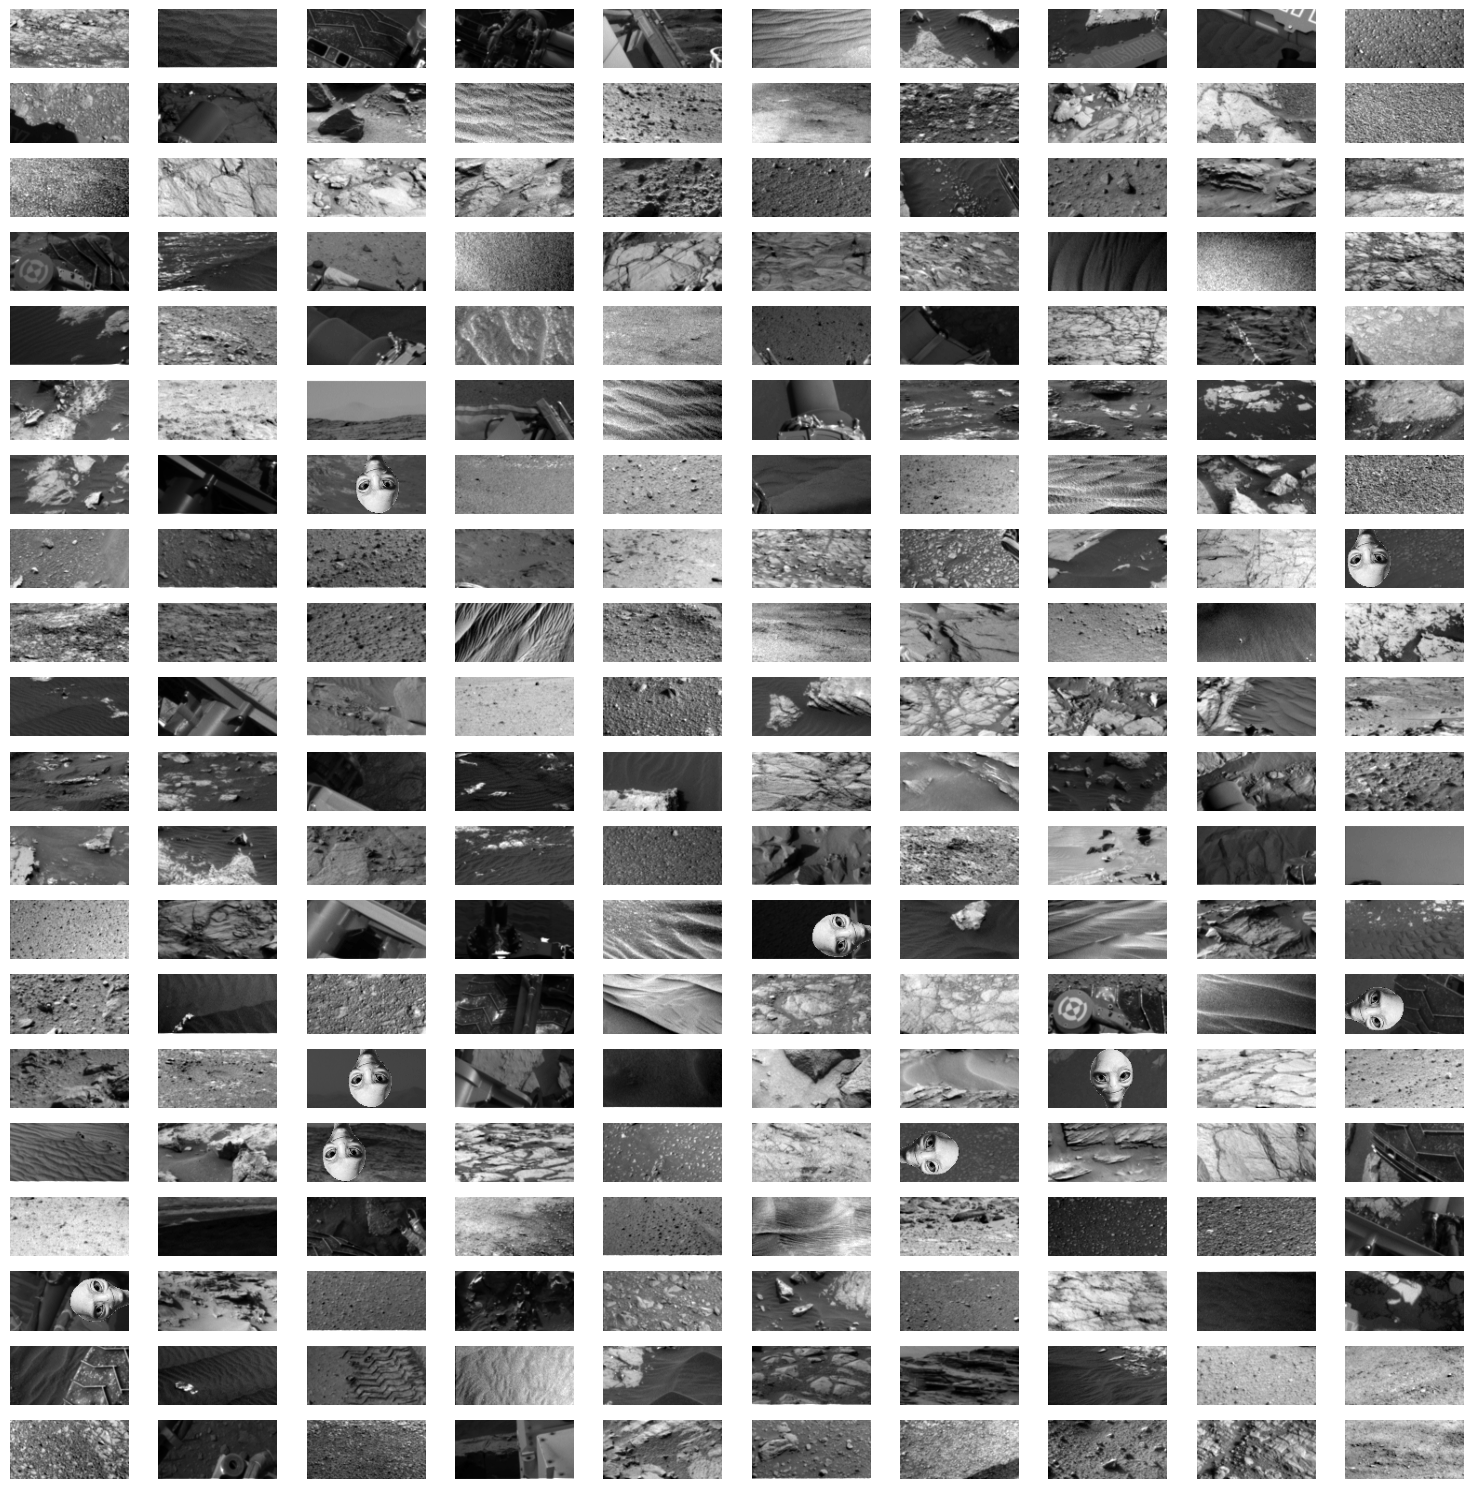

In [ ]:
# Display images of X_train in a given range

start_index = 0 #@param {type:"integer"}
end_index = 200 #@param {type:"integer"}

# Check if the specified range is valid
num_images = end_index - start_index
cols = 10  # Number of images per row
rows = (num_images + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
axes = axes.ravel()  # Flatten the axes array for easy iteration

for i in range(start_index, end_index):
    image = X_train[i]
    axes[i-start_index].imshow(image, cmap='gray')
    axes[i-start_index].axis('off')

for j in range(num_images, len(axes)):
    axes[j].axis('off')  # Hide any extra subplots

plt.tight_layout()
plt.show()

# 🥳 Visualize test set: there are no augmentations!

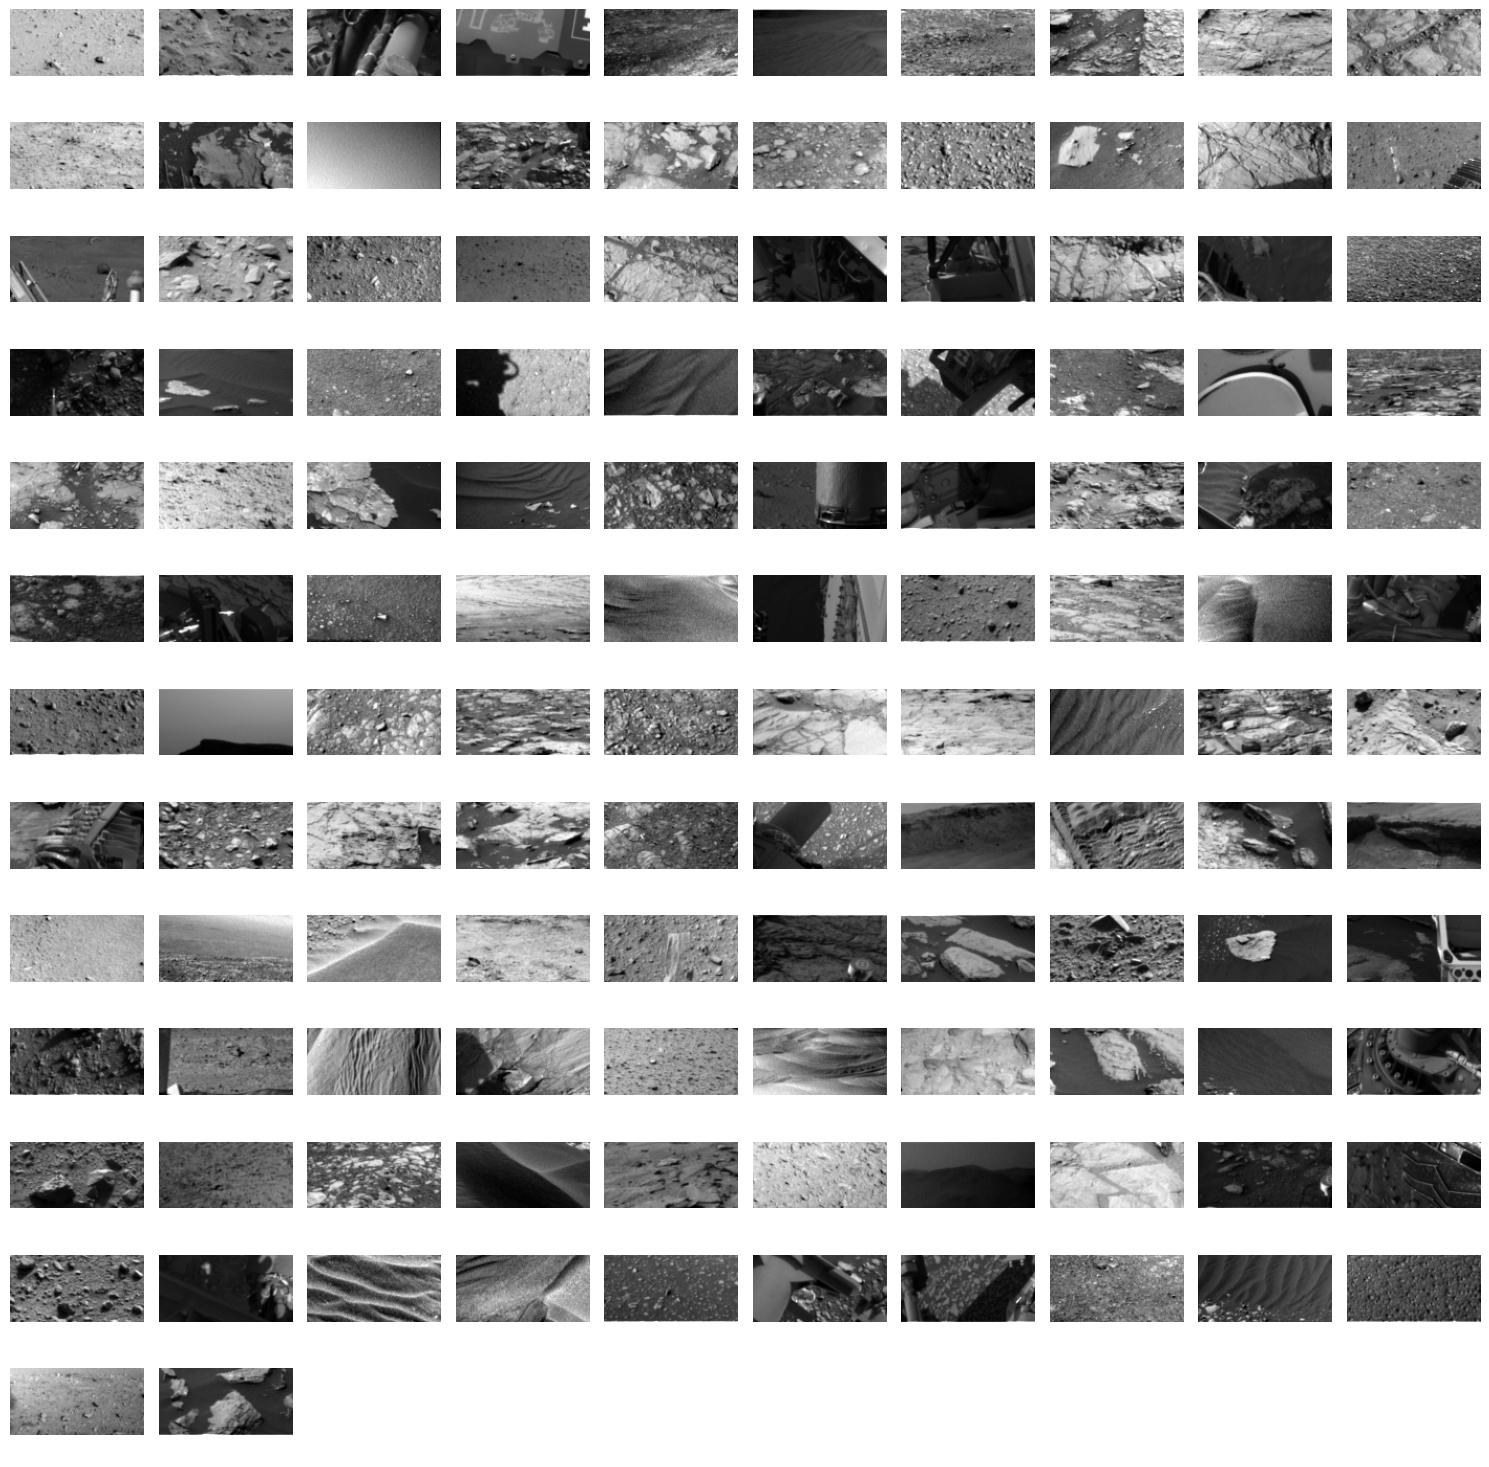

In [ ]:
# Display images of X_test in a given range

start_index = 9900 #@param {type:"integer"}
end_index = 10022 #@param {type:"integer"}

# Check if the specified range is valid
num_images = end_index - start_index
cols = 10  # Number of images per row
rows = (num_images + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
axes = axes.ravel()  # Flatten the axes array for easy iteration

for i in range(start_index, end_index):
    image = X_test[i]
    axes[i-start_index].imshow(image, cmap='gray')
    axes[i-start_index].axis('off')

for j in range(num_images, len(axes)):
    axes[j].axis('off')  # Hide any extra subplots

plt.tight_layout()
plt.show()

# 🏷️ Visualize training labels
Note that all the outliers have the same label

In [ ]:
def apply_colormap(label):
    num_classes = 5
    colormap = plt.cm.viridis(np.linspace(0, 1, num_classes))
    colored_label = colormap[label.astype(int)]
    return colored_label

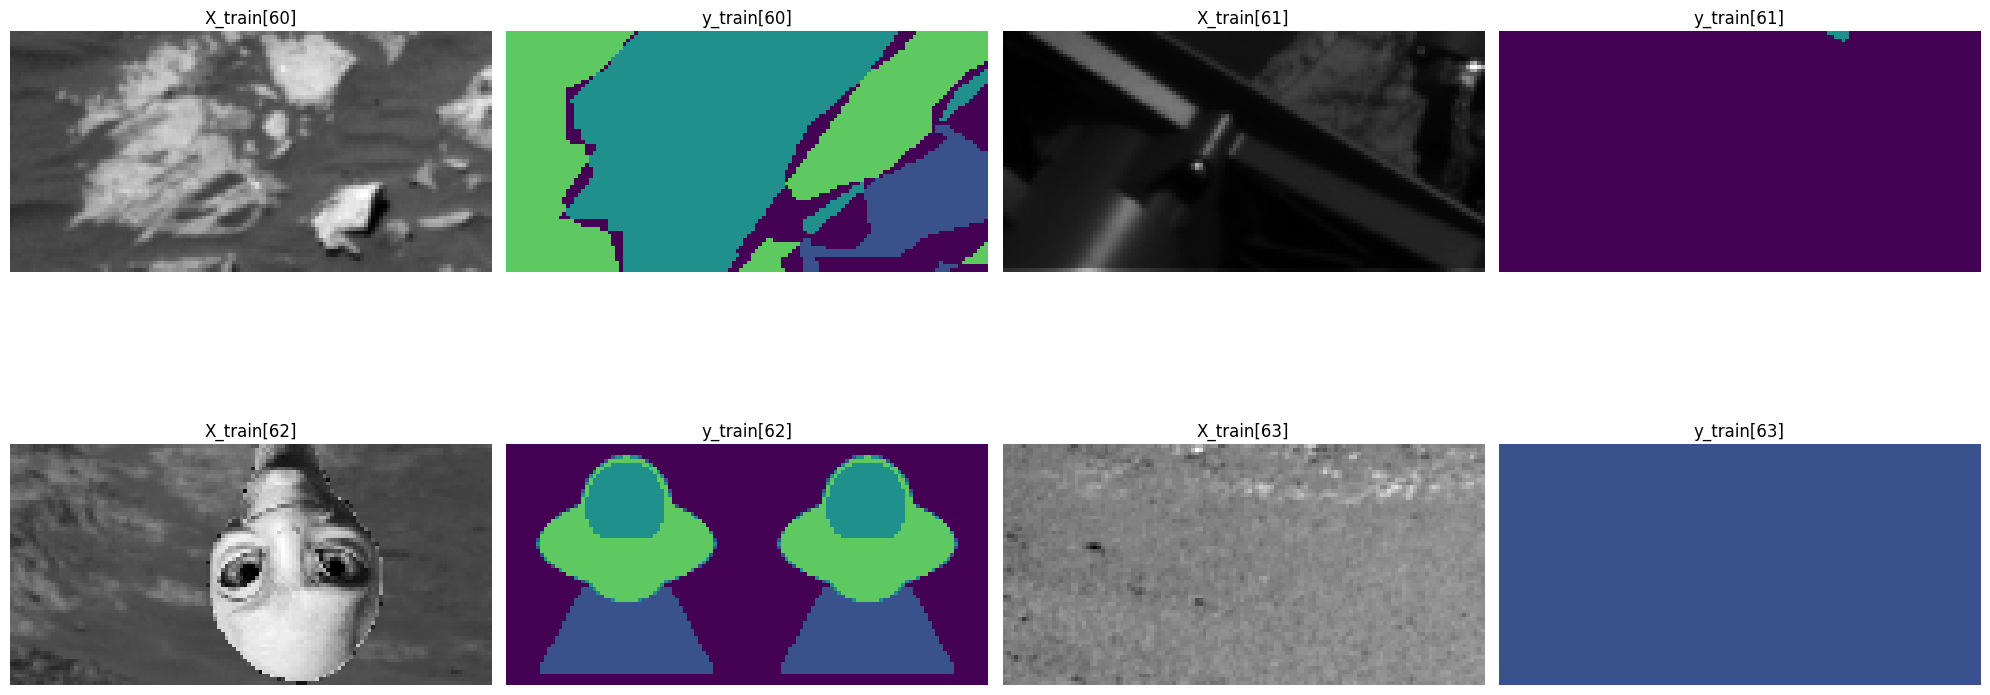

In [ ]:
# Display images of X_train and their corresponding labels (y_train)

start_index = 60  #@param {type:"integer"}
end_index = 64  #@param {type:"integer"}

num_images = end_index - start_index
cols = 2
rows = (num_images + cols - 1) // cols

fig, axes = plt.subplots(rows, 2 * cols, figsize=(20, 10))  # Double the columns to show X_train and y_train side-by-side
axes = axes.ravel()

for i in range(start_index, end_index):
    # Original image
    axes[2 * (i - start_index)].imshow(X_train[i], cmap='gray')
    axes[2 * (i - start_index)].set_title(f"X_train[{i}]")
    axes[2 * (i - start_index)].axis('off')

    # Corresponding label image
    axes[2 * (i - start_index) + 1].imshow(apply_colormap(y_train[i]))
    axes[2 * (i - start_index) + 1].set_title(f"y_train[{i}]")
    axes[2 * (i - start_index) + 1].axis('off')

for j in range(2 * num_images, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# 🗑️ Remove outliers

In [ ]:
outlier_label = y_train[62]

deleted_images = []
indices_to_remove = []

for i in range(len(y_train)):
    if np.array_equal(y_train[i], outlier_label):
        deleted_images.append(X_train[i])
        indices_to_remove.append(i)

X_train = np.delete(X_train, indices_to_remove, axis=0)
y_train = np.delete(y_train, indices_to_remove, axis=0)

print(f"Number of deleted images: {len(deleted_images)}")
print(f"Shape of X_train after deletion: {X_train.shape}")
print(f"Shape of y_train after deletion: {y_train.shape}")

Number of deleted images: 110
Shape of X_train after deletion: (2505, 64, 128)
Shape of y_train after deletion: (2505, 64, 128)


Visualize all deleted images

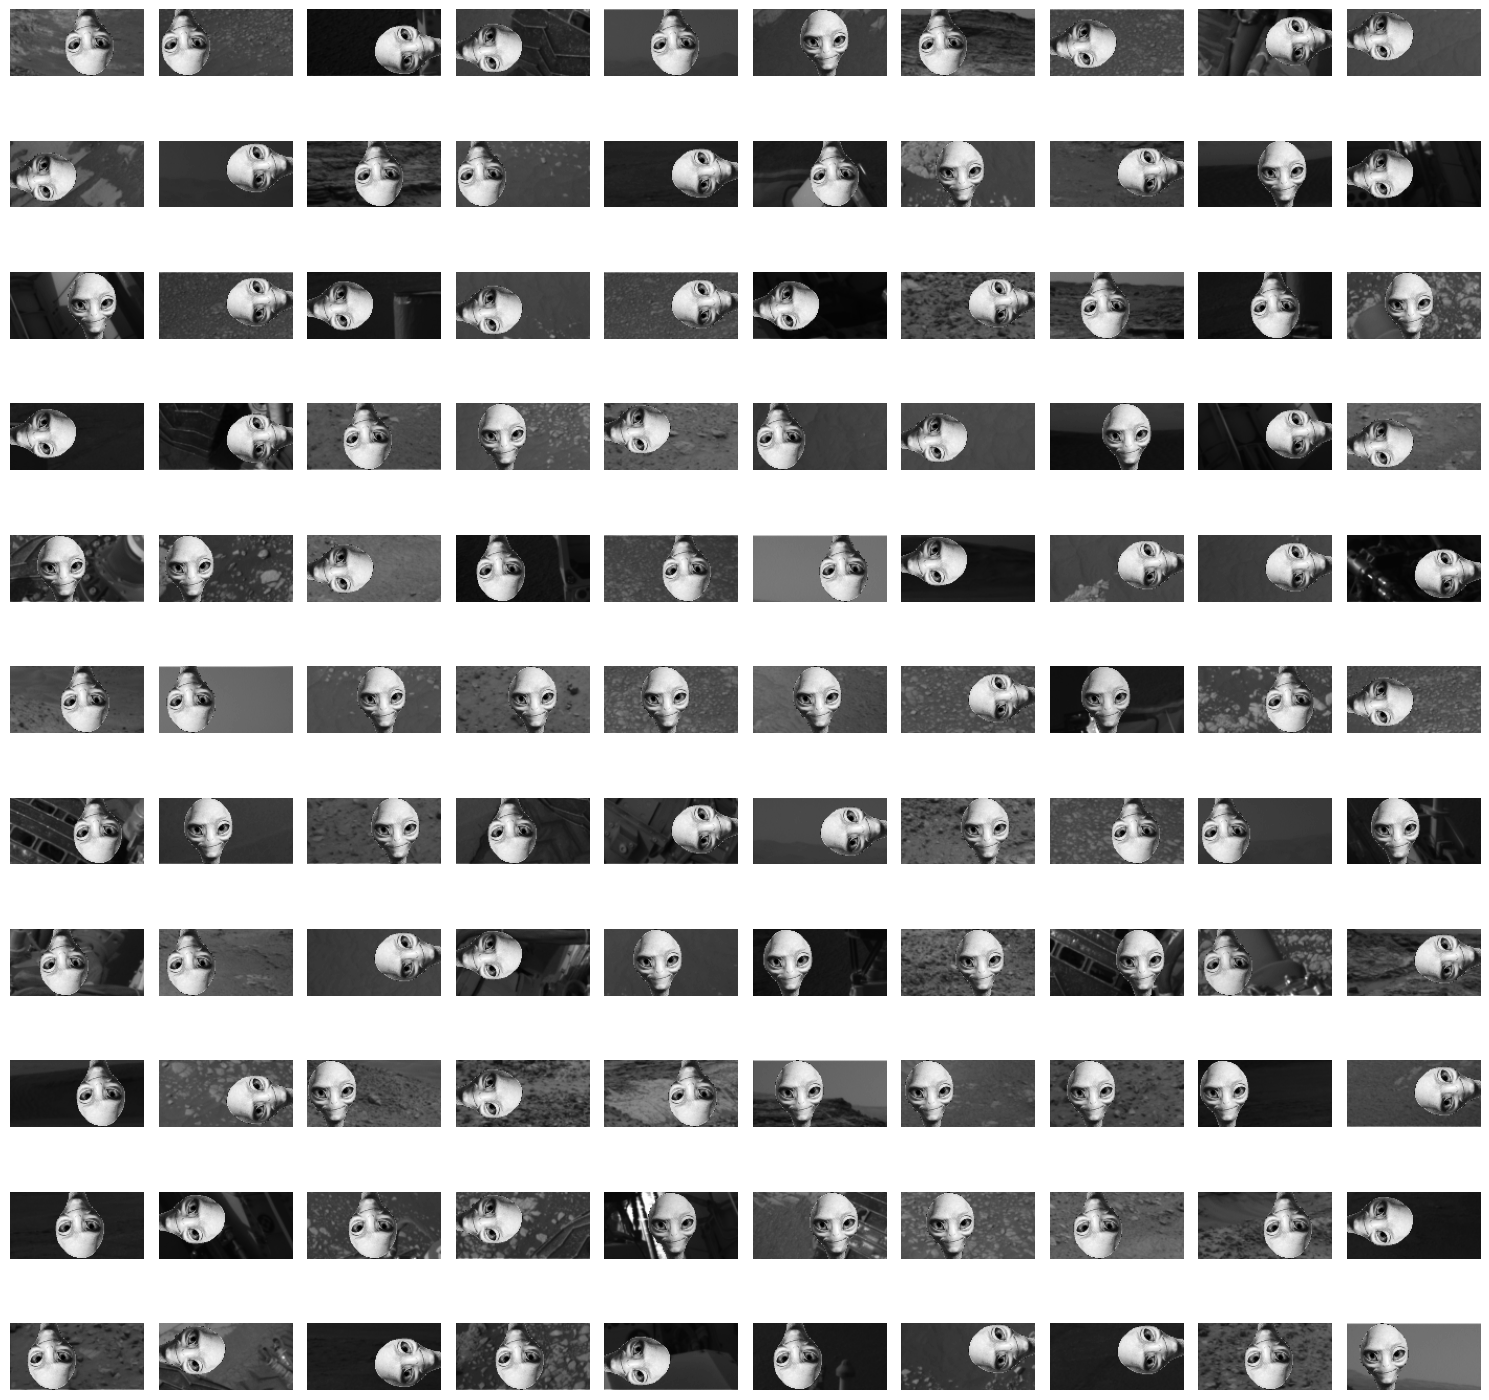

In [ ]:
# Display deleted images
num_deleted_images = len(deleted_images)
cols = 10  # Number of images per row
rows = (num_deleted_images + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
axes = axes.ravel()  # Flatten the axes array for easy iteration

for i in range(num_deleted_images):
    image = deleted_images[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')

for j in range(num_deleted_images, len(axes)):
    axes[j].axis('off')  # Hide any extra subplots

plt.tight_layout()
plt.show()

# 🛟 Save clean dataset in a new file

In [ ]:
np.savez_compressed("clean_dataset.npz", images=X_train, labels=y_train)

# 📊 STATISTICS

In [ ]:
data = np.load("clean_dataset.npz")
images = data["images"]
labels = data["labels"]

In [ ]:
images.shape

(2505, 64, 128)

## 🔆 Pixel Intensity

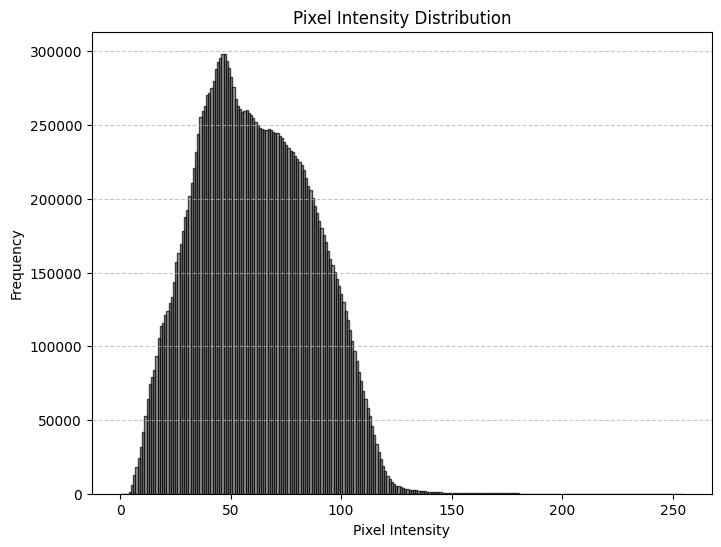

Mean Pixel Intensity: 60.90
Standard Deviation of Pixel Intensity: 25.99


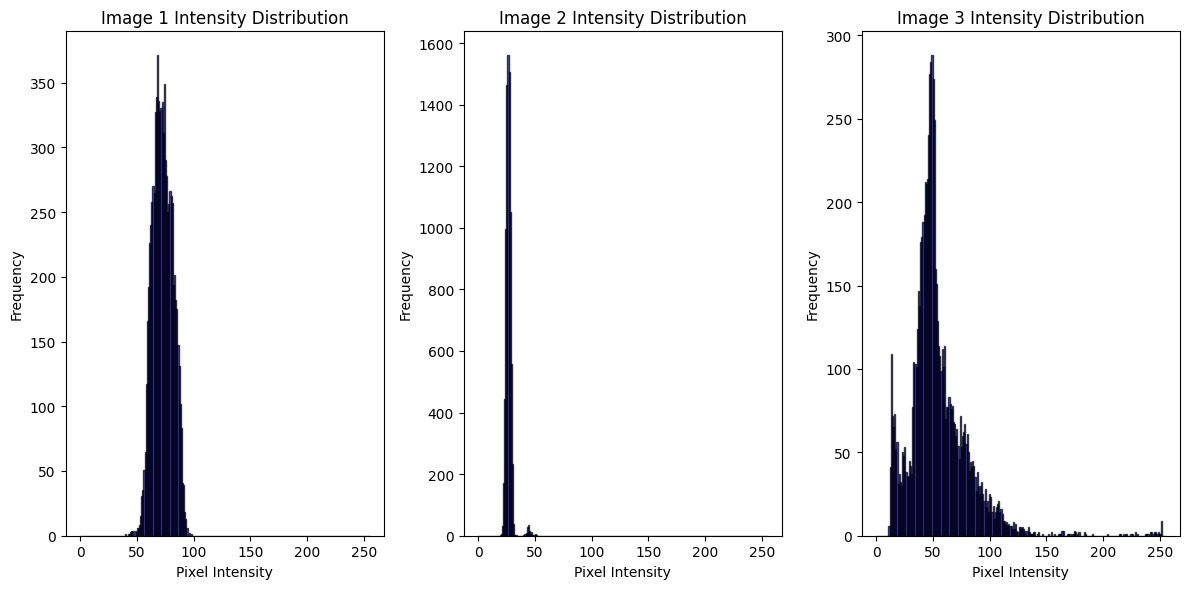

In [ ]:
# Calculate pixel intensity statistics
pixel_values = images.flatten()  # Flatten the images to get all pixel values
mean_intensity = np.mean(pixel_values)
std_intensity = np.std(pixel_values)

# Create a histogram of pixel intensities
plt.figure(figsize=(8, 6))
plt.hist(pixel_values, bins=256, range=(0, 255), color='gray', alpha=0.7, edgecolor='black')
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print summary statistics
print(f"Mean Pixel Intensity: {mean_intensity:.2f}")
print(f"Standard Deviation of Pixel Intensity: {std_intensity:.2f}")

# Plot intensity distribution across a few images
plt.figure(figsize=(12, 6))
for i in range(3):  # Visualize intensity histogram for first 3 images
    plt.subplot(1, 3, i + 1)
    plt.hist(images[i].flatten(), bins=256, range=(0, 255), color='blue', alpha=0.7, edgecolor='black')
    plt.title(f"Image {i + 1} Intensity Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

## 🏘️ Class distribution

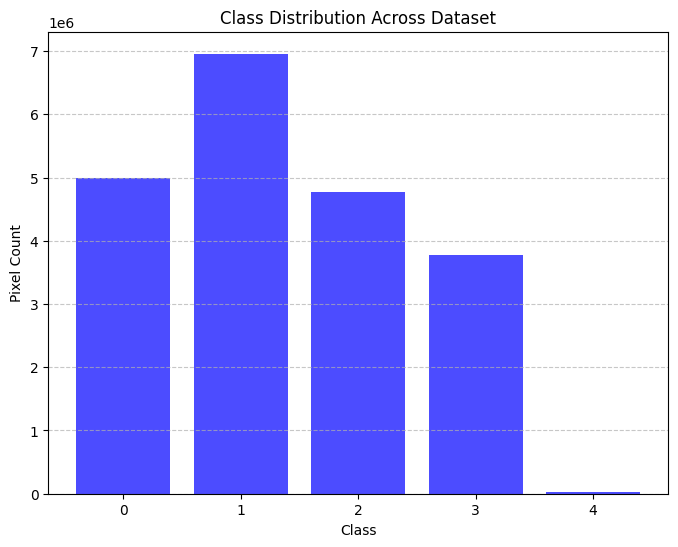

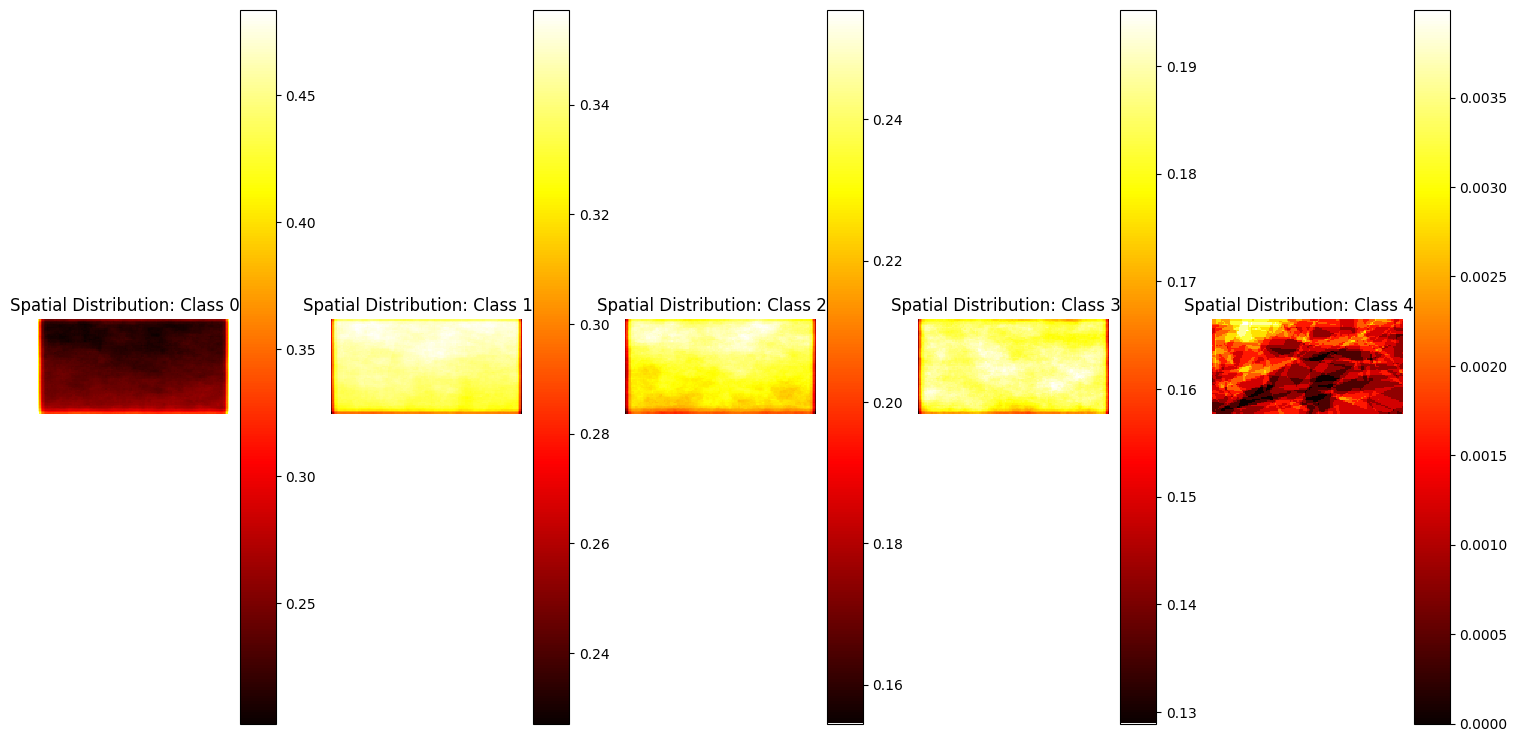

In [ ]:

# Class Distribution Analysis
unique_classes, class_counts = np.unique(labels, return_counts=True)

# Display Class Distribution
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color='blue', alpha=0.7)
plt.xlabel("Class")
plt.ylabel("Pixel Count")
plt.title("Class Distribution Across Dataset")
plt.xticks(unique_classes)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Spatial Distribution Analysis
height, width = labels.shape[1:]  # Shape of individual images
class_heatmaps = {cls: np.zeros((height, width), dtype=np.float64) for cls in unique_classes}

for label in labels:
    for cls in unique_classes:
        class_heatmaps[cls] += (label == cls).astype(np.float64)

# Normalize heatmaps by number of images
num_images = len(labels)
for cls in class_heatmaps:
    class_heatmaps[cls] /= num_images

# Plot spatial distribution heatmaps for each class
plt.figure(figsize=(15, 10))
for i, cls in enumerate(unique_classes):
    plt.subplot(1, len(unique_classes), i + 1)
    plt.imshow(class_heatmaps[cls], cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Spatial Distribution: Class {cls}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## 🎧 Analyze Noise levels

Noise Level Statistics:
Mean Noise Level: 3.8924
Median Noise Level: 3.7733
Standard Deviation of Noise Levels: 1.8462


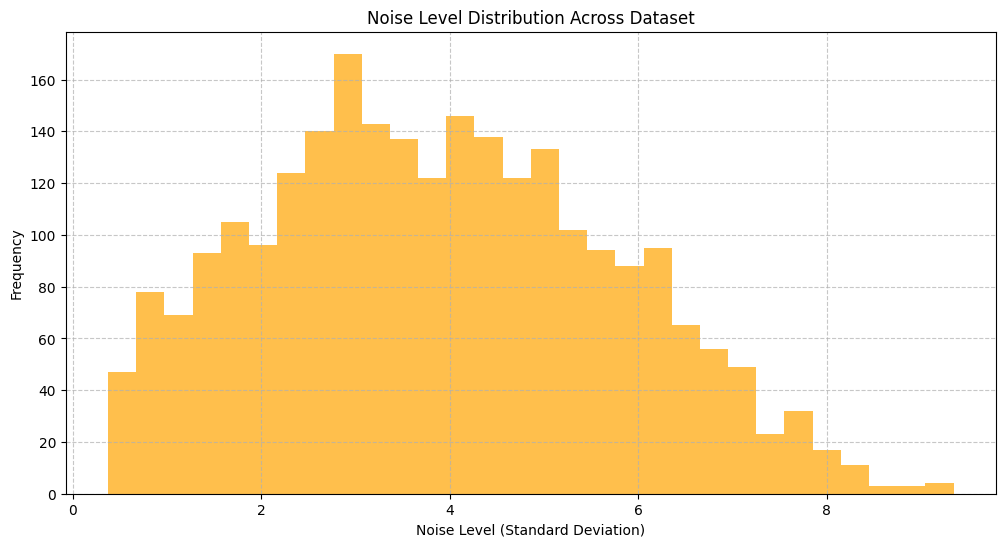

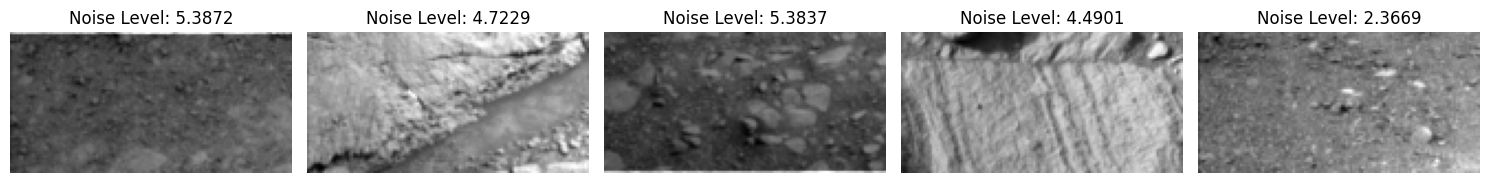

In [ ]:
def calculate_noise_level(image):

    # Apply Gaussian blur to smooth the image
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Calculate the standard deviation of pixel intensities
    noise_std = np.std(image - blurred)
    return noise_std

# Calculate noise levels for all images
noise_levels = np.array([calculate_noise_level(image) for image in images])

# Print statistics
mean_noise = np.mean(noise_levels)
median_noise = np.median(noise_levels)
std_noise = np.std(noise_levels)

print(f"Noise Level Statistics:")
print(f"Mean Noise Level: {mean_noise:.4f}")
print(f"Median Noise Level: {median_noise:.4f}")
print(f"Standard Deviation of Noise Levels: {std_noise:.4f}")

# Visualization
plt.figure(figsize=(12, 6))
plt.hist(noise_levels, bins=30, color='orange', alpha=0.7)
plt.xlabel("Noise Level (Standard Deviation)")
plt.ylabel("Frequency")
plt.title("Noise Level Distribution Across Dataset")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Optionally, visualize some images with their noise levels
sample_indices = np.random.choice(len(images), 5, replace=False)
plt.figure(figsize=(15, 10))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[idx], cmap='gray')
    plt.title(f"Noise Level: {noise_levels[idx]:.4f}")
    plt.axis('off')
plt.tight_layout()
plt.show()